In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preparing Dataset for the model

Found 185 files belonging to 10 classes.
Class Names :-  ['ms_dhoni', 'mujeeb_ur_rahman', 'mushfiqur_rahim', 'rashid_khan', 'ravindra_jadeja', 'rohit_sharma', 'ross_taylor', 'samiullah_shinwari', 'sarfaraz_ahmed', 'steve_smith']
Found 184 files belonging to 10 classes.
Found 541 files belonging to 10 classes.
Data prepared successfully!


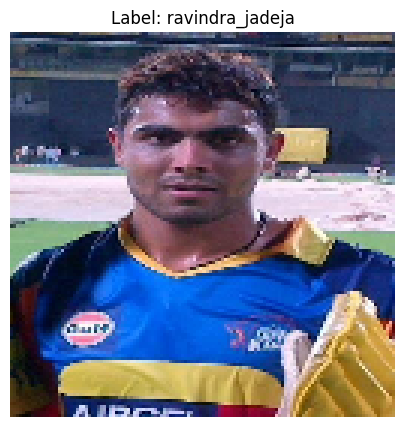

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define paths to datasets
train_dir = '/content/drive/MyDrive/Internship_Dataset/Splitted_Dataset/test'
val_dir = '/content/drive/MyDrive/Internship_Dataset/Splitted_Dataset/validation'
test_dir = '/content/drive/MyDrive/Internship_Dataset/Splitted_Dataset/train'

# Define image properties
image_size = (128, 128)
batch_size = 8

# Create data loaders
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=batch_size
)
class_names = train_dataset.class_names
print("Class Names :- ",train_dataset.class_names)


val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=image_size,
    batch_size=batch_size
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=image_size,
    batch_size=batch_size
)

# Normalize the datasets
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

print("Data prepared successfully!")

# Display one image from the train_dataset with class name
for images, labels in train_dataset.take(1):  # Take one batch
    plt.figure(figsize=(5, 5))
    plt.imshow(images[0].numpy())  # Show the first image in the batch
    class_name = class_names[labels[0].numpy()]  # Get the class name
    plt.title(f"Label: {class_name}")  # Display class name
    plt.axis('off')
    plt.show()

# Creating Model

In [9]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(11, activation='softmax')  # Adjust number of classes
])

# Define the learning rate
learning_rate = 0.001

# Compile the model with the specified learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,306,059 (12.61 MB)

 Trainable params: 3,306,059 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

None


# Fitting Model

In [10]:
a = model.fit(
    train_dataset,
    validation_data=val_dataset,
    batch_size=8,
    epochs=10
)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.1057 - loss: 2.5807 - val_accuracy: 0.1467 - val_loss: 2.3214
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 446ms/step - accuracy: 0.2023 - loss: 2.2792 - val_accuracy: 0.1685 - val_loss: 2.2472
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 362ms/step - accuracy: 0.4005 - loss: 1.8286 - val_accuracy: 0.2446 - val_loss: 2.2378
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 425ms/step - accuracy: 0.5652 - loss: 1.2380 - val_accuracy: 0.3859 - val_loss: 2.2158
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 576ms/step - accuracy: 0.8545 - loss: 0.6247 - val_accuracy: 0.3478 - val_loss: 3.7442
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 355ms/step - accuracy: 0.9097 - loss: 0.3350 - val_accuracy: 0.4185 - val_loss: 4.3425
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 456ms/step - accuracy: 0.9533 - loss: 0.1102 - val_accuracy: 0.4457 - val_loss: 3.9244
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 351ms/step - accuracy: 0.9837 - loss: 0.0463 - val_accuracy

# Checking Model

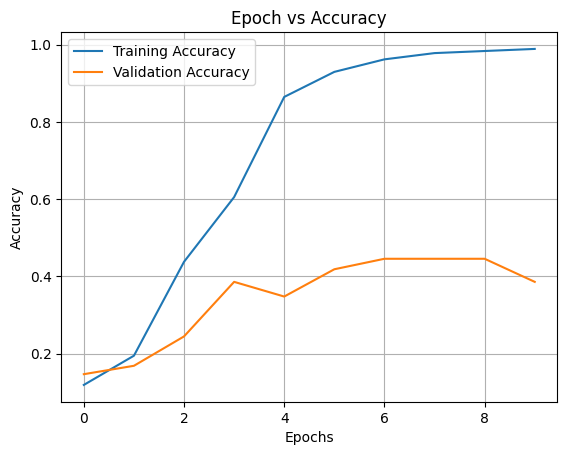

In [11]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.plot(a.history['accuracy'], label='Training Accuracy')
plt.plot(a.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Model Performance



In [12]:
import numpy as np

# Get a batch of images from the test dataset
for images, labels in test_dataset.take(1):  # Take one batch
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    print("Predicted Classes:", predicted_classes)
    print("True Classes:", labels.numpy())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
Predicted Classes: [6 8 6 6 6 1 6 6]
True Classes: [6 8 6 9 3 4 8 4]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


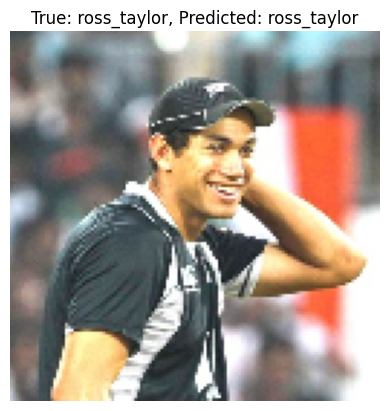

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Take one batch from the test dataset
for images, labels in test_dataset.take(4):
    # Pick the first image and its label
    image = images[0]
    true_label = labels[0].numpy()

    # Predict the class for the image
    predictions = model.predict(tf.expand_dims(image, axis=0))  # Add batch dimension
    predicted_class = np.argmax(predictions[0])  # Get the class with the highest probability

    # Display the image
    plt.imshow(image.numpy())  # Convert the image tensor to numpy and display
    plt.title(f"True: {class_names[true_label]}, Predicted: {class_names[predicted_class]}")
    plt.axis('off')  # Hide axes
    plt.show()

    break  # Exit after displaying the first image


# Preparing Model with LR-0.0005 to avoid overfitting

In [14]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Define the improved model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),  # Add dropout to reduce overfitting
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Add dropout here as well
    layers.Dense(11, activation='softmax')  # Adjust number of classes
])

# Compile the model
learning_rate = 0.0005  # Reduced learning rate for stability
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,306,059 (12.61 MB)

 Trainable params: 3,306,059 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
a = model.fit(
    train_dataset,
    validation_data=val_dataset,
    batch_size=8,
    epochs=10
)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 392ms/step - accuracy: 0.1282 - loss: 2.4269 - val_accuracy: 0.1304 - val_loss: 2.3286
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 445ms/step - accuracy: 0.1283 - loss: 2.3342 - val_accuracy: 0.2283 - val_loss: 2.3107
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 373ms/step - accuracy: 0.2062 - loss: 2.2486 - val_accuracy: 0.2065 - val_loss: 2.1986
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 378ms/step - accuracy: 0.2775 - loss: 2.0181 - val_accuracy: 0.2663 - val_loss: 2.1205
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 446ms/step - accuracy: 0.4369 - loss: 1.6662 - val_accuracy: 0.3098 - val_loss: 2.0541
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 373ms/step - accuracy: 0.5617 - loss: 1.2908 - val_accuracy: 0.3696 - val_loss: 1.9541
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 418ms/step - accuracy: 0.7659 - loss: 0.9415 - val_accuracy: 0.4130 - val_loss: 2.1762
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 449ms/step - accuracy: 0.8786 - loss: 0.4288 - val_accura

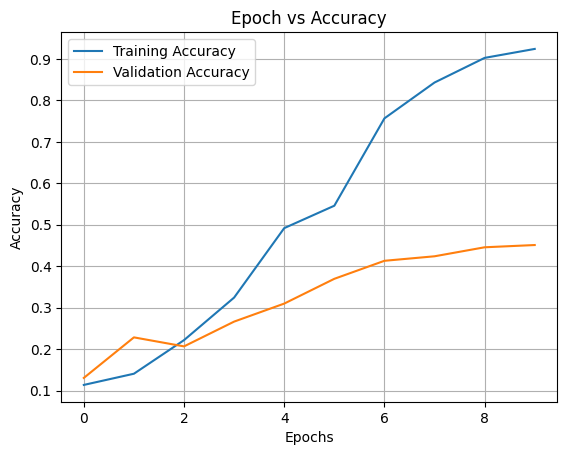

In [16]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.plot(a.history['accuracy'], label='Training Accuracy')
plt.plot(a.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()